##M Levine Weather Py 09_082018
###UCI Data Analytics Bootcamp

# WeatherPy
----

###Observations and Analysis

It is clear that Latitude--which runs up and down on the Earth (Equator is at 0 degrees Latitude)--as our independent variable explains quite a few weather patterns:

First, the closer to the equator, the higher average temperature. We can see this in our graphs below. Further, I was curious as to whether any of the relationships between our variables were linear; as a result, I plotted a linear regression line through each plot. However, the line did not fit any of our data very well leading us to the conclusion that the relationship between latitude and temperature, humidity, cloudiness and wind speed may not be linear. We may be able to fit the relationship with a Loess or some other transformation. Second, in concert with higher average temperatures, being closer to the equator affords its residents with a bit of water in the form of humudity! So, closer to the equator equates to hotter days and more sweating! Next, it tends to be cloudier towards the northern pole: at +60 to +90 degrees latitude, there is more cloudiness. However, this cloudiness trend is not easily observable throughout the rest of the latitude plane. The correlation plot shows us that latitude and temperature variables are negatively correlated whereby the coefficient is close to -0.25. Cloudiness and humidity are positively correlated (corrleation coefficient of ~ +0.40).

This analysis could have benefitted from a few items:
First, we should be able to plot longitude vs the weather variables (temp, humidity,cloudiness, etc). While the spread of latitude was quite random and spanned from -54.81 degrees to +78.22 degrees (+133.03 range), longitude would give us a better feel for east vs west and add a much needed dimension. Further, it would be great for the exercise to include forecasting weather simply based on latitude, longitude. 




In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd
import numpy as np
import requests
from datetime import date
import plotly.plotly as py
import plotly.graph_objs as go
from numpy import arange,array,ones
from scipy import stats

# Import API key
from apikey import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations; we set our seed at 123 so we can reproduce the same output later!
np.random.seed(123)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(city)
#for some reason one city is popping out so i need to delete
#it; when i merge the lists into a data frame, they all need to be the same length
del city


jamestown


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

### We need to bring in the following:


* Temperature (F) vs. Latitude; *Humidity (%) vs. Latitude; 
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

**This is what one successful API call looks like; the code is 200. Because of that, we need to filter for 200s only
using an IF ELSE statement:
print(response){'coord': {'lon': 67.39, 'lat': 56.82}, 'weather': {'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 53.92, 'pressure': 1016.13, 'humidity': 77, 'temp_min': 53.92, 'temp_max': 53.92, 'sea_level': 1025.92, 'grnd_level': 1016.13}, 'wind': {'speed': 5.59, 'deg': 260.503}, 'clouds': {'all': 8}, 'dt': 1536451174, 'sys': {'message': 0.0091, 'country': 'RU', 'sunrise': 1536367710, 'sunset': 1536415554}, 'id': 1485712, 'name': 'Yurginskoye', 'cod': 200}


In [147]:
#loop through the list of cities and perform a request for data on each
#Let's store our vital api call objects:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
cities_list = []
lat = []
long = []
temp = []
max_temp = []
min_temp = []
Humidity = []
Wind_Speed =  []
Cloudiness = []
counter = 1


#This is the crux of the code in this exercise. We need to first create a for loop which 
#attempts to ping/find any given city from our citipy cities list (up to 1,500 randomly chosen cities above)
#with the OpenWeather API. There is a major issue with this because the API does not contain some of the randomly
#chosen cities from our cities list above! So, we need to insert an if else statement which looks for a successful 
#or cod = 200, call. If if finds it, we print that we successfully found a city with Open Weather. Then,

for city in cities:
    response = requests.get(query_url+city).json()
    
    if response['cod'] == 200:
        print(f"Successfully loading {response['name']} {counter} of {len(cities)} total possible cities; please wait! :)")
        counter += 1
        cities_list.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        min_temp.append(response['main']['temp_min'])
        Humidity.append(response['main']['humidity'])
        Wind_Speed.append(response['wind']['speed'])
        Cloudiness.append(response['clouds']['all'])
        
    else:
        print("Skip city, going onto next")
        
        
        
    


#Cities_dataframe = pd.DataFrame({"Cities": cities,
 #                               "Lat": lat})



Successfully loading Camacha 0 of 598 total possible cities; please wait! :)
Successfully loading Mataura 1 of 598 total possible cities; please wait! :)
Successfully loading Hobart 2 of 598 total possible cities; please wait! :)
Skip city, going onto next
Successfully loading Manacor 3 of 598 total possible cities; please wait! :)
Successfully loading Sao Jose da Coroa Grande 4 of 598 total possible cities; please wait! :)
Successfully loading Barrow 5 of 598 total possible cities; please wait! :)
Successfully loading Levelland 6 of 598 total possible cities; please wait! :)
Successfully loading Ambon 7 of 598 total possible cities; please wait! :)
Successfully loading Morondava 8 of 598 total possible cities; please wait! :)
Successfully loading Rikitea 9 of 598 total possible cities; please wait! :)
Successfully loading Ogden 10 of 598 total possible cities; please wait! :)


KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [138]:

cities_df = pd.DataFrame({"Cities": cities_list,
                          "Lat": lat,
                          "Long": long,
                          "Temp":temp,
                          "Humidity": Humidity,
                          "Wind Speed": Wind_Speed,
                          "Cloudiness": Cloudiness})
cities_df.head()
cities_df.tail()
cities_df.describe()


,Lat,Long,Temp,Humidity,Wind Speed,Cloudiness
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,19.552066,20.461568,63.366125,77.546125,7.432288,36.874539
std,33.347517,88.861284,14.743299,21.679157,5.289075,36.710373
min,-54.810000,-179.170000,22.870000,2.000000,0.560000,0.000000
25%,-8.860000,-56.132500,52.952500,66.000000,3.360000,0.000000
50%,25.390000,23.215000,64.910000,83.000000,5.820000,22.000000
75%,47.530000,98.025000,75.200000,95.000000,10.290000,75.000000
max,78.220000,178.420000,111.610000,100.000000,29.970000,100.000000


###Let's look at a simple correlation plot


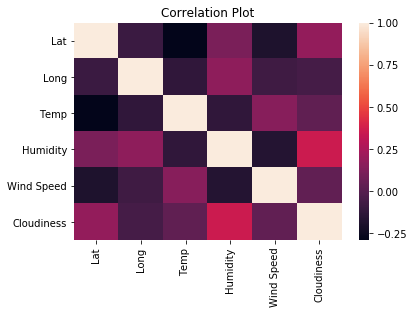

In [146]:
import seaborn as sns
corr = cities_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Plot')
plt.savefig('Cities Analysis Correlation Plot.png')

In [64]:
cities_df.to_csv("WeatherPy_ML.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot
##### Generated linear fit
---
While atmospheric relationships are hardly ever linear, we will attempt to draw a linear line through each of our
plots. This does not mean that we believe the relationship is linear; rather, linear regression is a basic and handy tool
to first test our data's relationship with each other. In each of the plots we will graph the linear regression line of best fit; R squared and other items are not going to be analyzed in this exercise but at first glance, our goodness of fit would be quite low. 


-0.12785736150554294


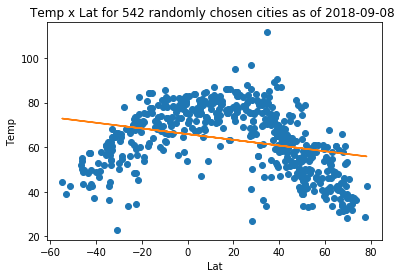

In [140]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Temp"])
line = slope*cities_df["Lat"]+intercept
print(slope)
now = datetime.datetime.now()
today = date.today()

plt.plot(cities_df["Lat"],cities_df["Temp"],'o',cities_df["Lat"] , line)
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.title(f'Temp x Lat for {len(cities_df)} randomly chosen cities as of {today} ')

plt.savefig('Temp as Function of Latitude.png')


#### Latitude vs. Humidity Plot

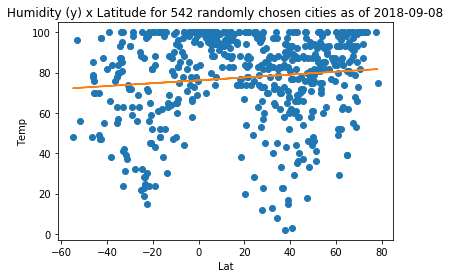

In [141]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Humidity"])
line_cloud = slope*cities_df["Lat"]+intercept
plt.plot(cities_df["Lat"],cities_df["Humidity"],'o',cities_df["Lat"],line_cloud)
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.title(f'Humidity (y) x Latitude for {len(cities_df)} randomly chosen cities as of {today}')
plt.savefig('Humidity as Function of Latitude.png')

#### Latitude vs. Cloudiness Plot

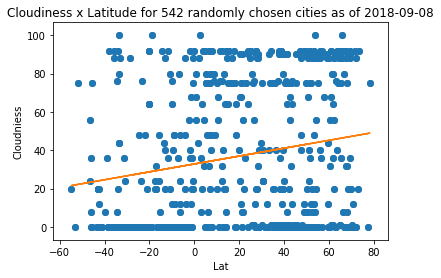

In [142]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Cloudiness"])
line_cloud = slope*cities_df["Lat"]+intercept
plt.plot(cities_df["Lat"],cities_df["Cloudiness"],'o',cities_df["Lat"],line_cloud)

plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.xlabel('Lat')
plt.ylabel('Cloudniess')
plt.title(f'Cloudiness x Latitude for {len(cities_df)} randomly chosen cities as of {today}')
plt.savefig('Cloudiness as Function of Latitude.png')

#### Latitude vs. Wind Speed Plot

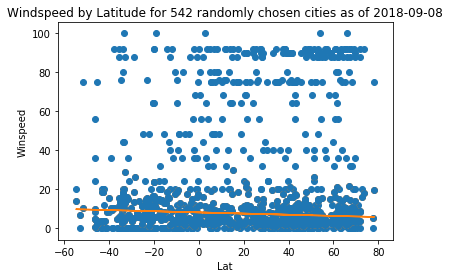

In [143]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cities_df["Lat"],cities_df["Wind Speed"])
line_cloud = slope*cities_df["Lat"]+intercept
plt.plot(cities_df["Lat"],cities_df["Wind Speed"],'o',cities_df["Lat"],line_cloud)

plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.xlabel('Lat')
plt.ylabel('Cloudniess')
plt.title(f'Cloudiness (y) as function of Latitude (x) for {len(cities_df)} randomly chosen cities ')
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"])
plt.xlabel('Lat')
plt.ylabel('Winspeed')
plt.title(f'Windspeed by Latitude for {len(cities_df)} randomly chosen cities as of {today}')
plt.savefig('Windspeed as Function of Latitude.png')